# Assignment Multilineal Regression

## Understanding Business Problem

***Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.***

    R&D Spend -- Research and devolop spend in the past few years
    Administration -- spend on administration in the past few years
    Marketing Spend -- spend on Marketing in the past few years
    State -- states from which data is collected
    Profit  -- profit of each state in the past few years

## Exploratory Data Analysis - EDA

    -- Basic understanding of the data
    -- missing values Identification
    -- Numerical variables / columns - Their Distribution
    -- Categorical Data - Cordinality
    -- Outliers
    -- Independent and Dependent variables and their Relationship

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Basic Data understanding

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup.shape

(50, 5)

In [3]:
startup.rename({'R&D Spend':'RND','Administration':'Admin','Marketing Spend':'Marketing'},inplace=True, axis = 1)
startup.head()

,RND,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Admin,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In line with our business problem we have been given a dataset with 5 columns where Three colums give information about the spend by the startups and one column gives information about the location of the startup. Lastly we have profits of the startups. let us explore further 

### Missing values and datatypes

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RND        50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.isnull().sum()

RND          0
Admin        0
Marketing    0
State        0
Profit       0
dtype: int64

As we can see ther are no missing values and we have only state variable as catagorical feature. let us prodeed futher.

### Numerical features and their distribution & Outlier identification

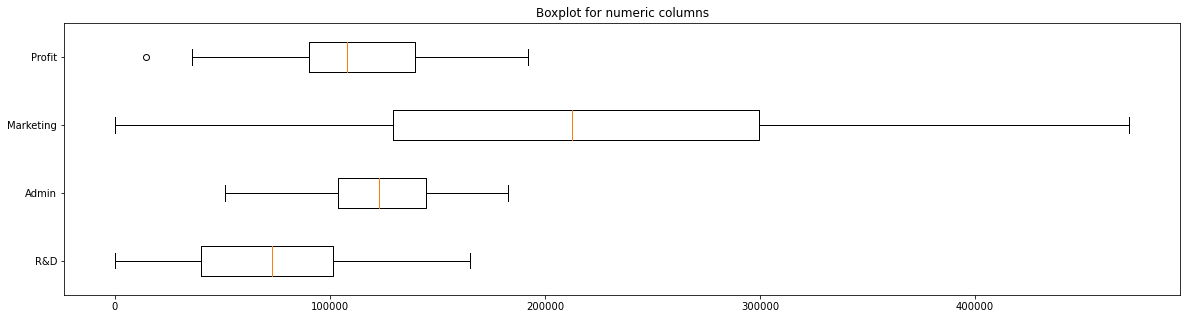

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,5))
plt.boxplot([startup.RND,startup.Admin,startup.Marketing,startup.Profit],vert=False)
plt.yticks([1,2,3,4],['R&D','Admin','Marketing','Profit'])
plt.title('Boxplot for numeric columns')
plt.show()

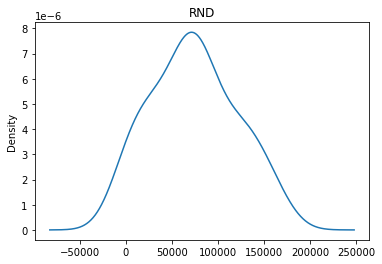

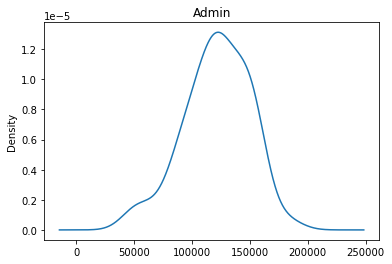

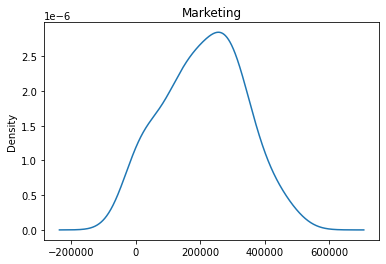

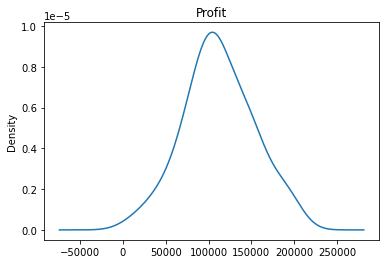

In [8]:
numerical_features  = [feature for feature in startup.columns if startup[feature].dtypes != 'O']
for feature in numerical_features:
    data = startup.copy()
    
    startup[feature].plot.kde()
    plt.title(feature)
    plt.show()

**It looks like only profit has an outlier and all other datasets are almost / nearly normally distributed. However, almost all data sets have their left tail crossing beoyond zeero, while profits can be less than zeero indicating losses but none of the expenses can be less than zeero. we will study them in detail while doing data transformation.**

### Categorical data and cordinality

In [9]:
import numpy as np
np.unique(startup.State)

array(['California', 'Florida', 'New York'], dtype=object)

In [10]:
startup.groupby(startup.State).sum()

,RND,Admin,Marketing,Profit
State,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98
Florida,1291584.26,1948302.36,3957176.82,1900384.39
New York,1295316.06,2066239.00,3490882.27,1933859.59


In [11]:
startup.groupby(startup.State).count()

,RND,Admin,Marketing,Profit
State,,,,
California,17,17,17,17
Florida,16,16,16,16
New York,17,17,17,17


**There are three categories in the state feature. Also all categories carry equal weight in the data set. we will tranform this data in the Feature engineering stage.**

### Independent and dependent variable and their relationship

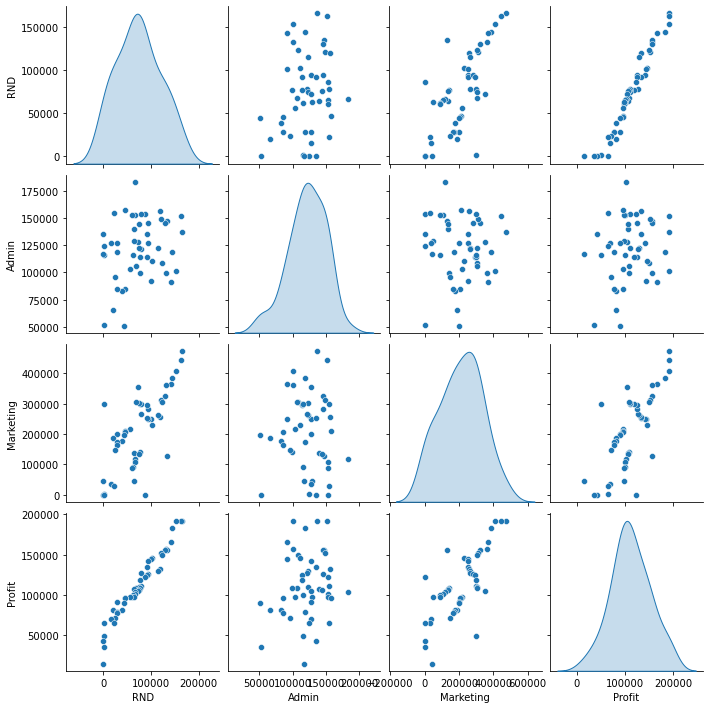

In [12]:
import seaborn as sns
sns.pairplot(startup,diag_kind='kde')
plt.show()

In [13]:
startup.corr()

,RND,Admin,Marketing,Profit
RND,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**As we can see that profit and R&D show a Strong positive linear correlation and Prfit and Marketing show a moderate positive linear correation and Admin and Profit show no correlation at all. Lastly if we can closely look there is moderate colinearity between Marketing and R&D. let is see further in our model building.** 

### Data transformation

In [14]:
edaData = startup.copy(deep = True)

edaData = pd.get_dummies(edaData,prefix='S')
edaData

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [15]:
edaData[(edaData.RND == 0)]

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New York
47,0.0,135426.92,0.00,42559.73,1,0,0
49,0.0,116983.80,45173.06,14681.40,1,0,0


In [16]:
edaData[edaData.Marketing == 0]

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New York
19,86419.70,153514.11,0.0,122776.86,0,0,1
47,0.00,135426.92,0.0,42559.73,1,0,0
48,542.05,51743.15,0.0,35673.41,0,0,1


There are totally 5 records where the values of spend are '0'. However, in the todays world it is very difficult to survive without marketing expenses. while there can be a debate over RND expenses being optional but Marketing expenses are mandatory. going by the todays trend most of the startup are driven by innovation which meanse there must be R&D expense however minimum it can be but it is mandatory. 

let us give benifit of doubt that expenses are the choice of management hance let us proceed.

In [17]:
edaData

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [18]:
edaData.rename({'S_New York' : 'S_New_York'},axis=1,inplace=True)
edaData.columns

Index(['RND', 'Admin', 'Marketing', 'Profit', 'S_California', 'S_Florida',
       'S_New_York'],
      dtype='object')

### check colinearity

In [19]:
import statsmodels.formula.api as smf

In [20]:
rsq_RND = smf.ols('RND~Admin+Marketing',data=edaData).fit().rsquared
vif_RND = 1/(1-rsq_RND)

rsq_Admin = smf.ols('Admin~RND+Marketing',data=edaData).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

rsq_Marketing = smf.ols('Marketing~Admin+RND',data=edaData).fit().rsquared
vif_Marketing = 1/(1-rsq_Marketing)

vif_df = pd.DataFrame({'Features':['RND','Admin','Marketing'],'VIF':[vif_RND,vif_Admin,vif_Marketing]})
vif_df

,Features,VIF
0,RND,2.468903
1,Admin,1.175091
2,Marketing,2.326773


***There is a weak Colinearity between the independent features. we can still proceed as there is week colinearity.***

In [54]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaledData = Scaler.fit_transform(edaData)
scaledData = pd.DataFrame(scaledData,columns=edaData.columns)

In [56]:
scaledData.sort_values(by='S_Florida',ascending=False)

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New_York
41,-1.008534,-1.320796,-0.384552,-0.857466,-0.717741,1.457738,-0.717741
12,0.443260,0.215449,0.320617,0.741155,-0.717741,1.457738,-0.717741
28,-0.168793,2.210141,-0.767189,-0.218798,-0.717741,1.457738,-0.717741
33,-0.401129,-0.659324,0.029817,-0.381787,-0.717741,1.457738,-0.717741
26,0.035370,0.821718,-0.635835,-0.157367,-0.717741,1.457738,-0.717741
23,-0.136201,-0.562211,0.774349,-0.082169,-0.717741,1.457738,-0.717741
22,0.006007,0.051850,0.762376,-0.041613,-0.717741,1.457738,-0.717741
36,-0.991570,0.205925,-0.081763,-0.533932,-0.717741,1.457738,-0.717741
18,0.396725,-0.258465,0.692992,0.307116,-0.717741,1.457738,-0.717741
14,1.017181,1.269199,0.375742,0.516026,-0.717741,1.457738,-0.717741


## Building a Model

In [57]:
model_1 = smf.ols('Profit~RND+Admin+Marketing+S_California+S_Florida+S_New_York',data=scaledData).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.34e-27
Time:                        19:17:03   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RND              0.9179      0.053     17.369      0.000       0.811       1.024
Admin           -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing        0.0819      0.052      1.574      0.123      -0.023       0.187
S_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
S_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
S_New_York      -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

    ->  Admin Spend shows week correlation(0.20) with profit and its p value is very high hence we drop Admin
    ->  Marketing spend shows good correlation(0.75) with Profit but its P_value greater than Alpha(0.05). May be there is colienearity issue we shall check the impact.
    ->  All the states have very high P_value which is way greater than Alpha hence we drop these features.

In [61]:
model_2 = smf.ols('Profit~RND+Marketing+S_California+S_Florida+S_New_York', data = scaledData).fit()
print(model_2.rsquared, '\n' ,model_2.pvalues)

0.950453304509085 
 Intercept       1.000000e+00
RND             6.509785e-23
Marketing       7.204640e-02
S_California    9.833961e-01
S_Florida       9.589193e-01
S_New_York      9.749106e-01
dtype: float64


Even after dropping admin spend feature, all the features, except RND, still have P_values greater than alpha. Which clearly show that they do not show correlation woth Profit.  

In [62]:
model_3 = smf.ols('Profit~RND', data=scaledData).fit()
print(model_3.rsquared, '\n',model_3.pvalues)

0.9465353160804392 
 Intercept    1.000000e+00
RND          3.500322e-32
dtype: float64


RND shows good correlation and also P_value is close to zeero. this is a good feature to predict the Profit

In [63]:
model_4 = smf.ols('Profit~Admin',data=scaledData).fit() 
print(model_4.rsquared,'\n',model_4.pvalues)  #pvalue of Admin is very high hence we accept null hypothesis of nocorrelation

0.04028714077757234 
 Intercept    1.000000
Admin        0.162217
dtype: float64


In [64]:
model_5 = smf.ols('Profit~Marketing', data=scaledData).fit()
print(model_5.rsquared, '\n', model_5.pvalues)

0.5591535746115515 
 Intercept    1.000000e+00
Marketing    4.381073e-10
dtype: float64


Marketing alone is a good predictor of profit with correlation score of .74 and P_value less than Alpha, But when used along with RND it is not useful. 

In [69]:
df = pd.DataFrame({
        'Model_Name' : ['model_1','model_2','model_3','model_4','model_5'],
        'Rsquared':[model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared, model_5.rsquared],
        'Rsquared_adj':[model_1.rsquared_adj, model_2.rsquared_adj, model_3.rsquared_adj, model_4.rsquared_adj,
                        model_5.rsquared_adj],
        'AIC':[model_1.aic, model_2.aic, model_3.aic, model_4.aic, model_5.aic]
        })
df

,Model_Name,Rsquared,Rsquared_adj,AIC
0,model_1,0.950752,0.945156,3.349036
1,model_2,0.950453,0.946049,1.651868
2,model_3,0.946535,0.945421,-0.542845
3,model_4,0.040287,0.020293,143.837796
4,model_5,0.559154,0.549969,104.940918


As we can see that model_1, model_2 and model_3 have reasonably high Rsquared and Rsquared_adj but the model_3 clearly has the lowest AIC value hence we shall go for model 3

## Residual analysis  - Model_3

#### test of normality of residuals (Q-Q plot)

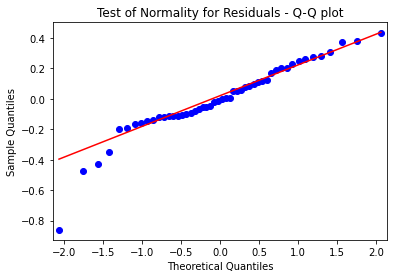

In [70]:
import statsmodels.api as sm
sm.qqplot(model_3.resid,line='q')
plt.title('Test of Normality for Residuals - Q-Q plot')
plt.show()

In [73]:
list(np.where(model_1.resid < -.42))

[array([14, 49], dtype=int64)]

as we can see that most of our residuals are close to the line clearly shows that the residuals are normally distributed. there is only one point at the bottom which is far away, Indicating that there could be one influential point

### Residual plot for Homoscedasticity

In [74]:
def get_stdiz_values(vals):
    return(vals - np.mean(vals))/np.sqrt(vals)

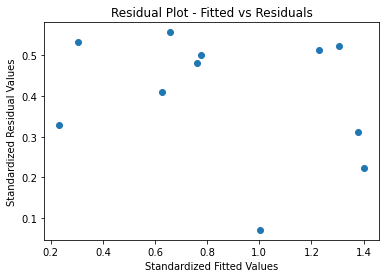

In [75]:
plt.scatter(get_stdiz_values(model_3.fittedvalues),get_stdiz_values(model_3.resid))
plt.title('Residual Plot - Fitted vs Residuals')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

As we can see that the points are scattered without any pattern shows that we have drawn our inferece as much as possible.

### Residuals vs Regressor

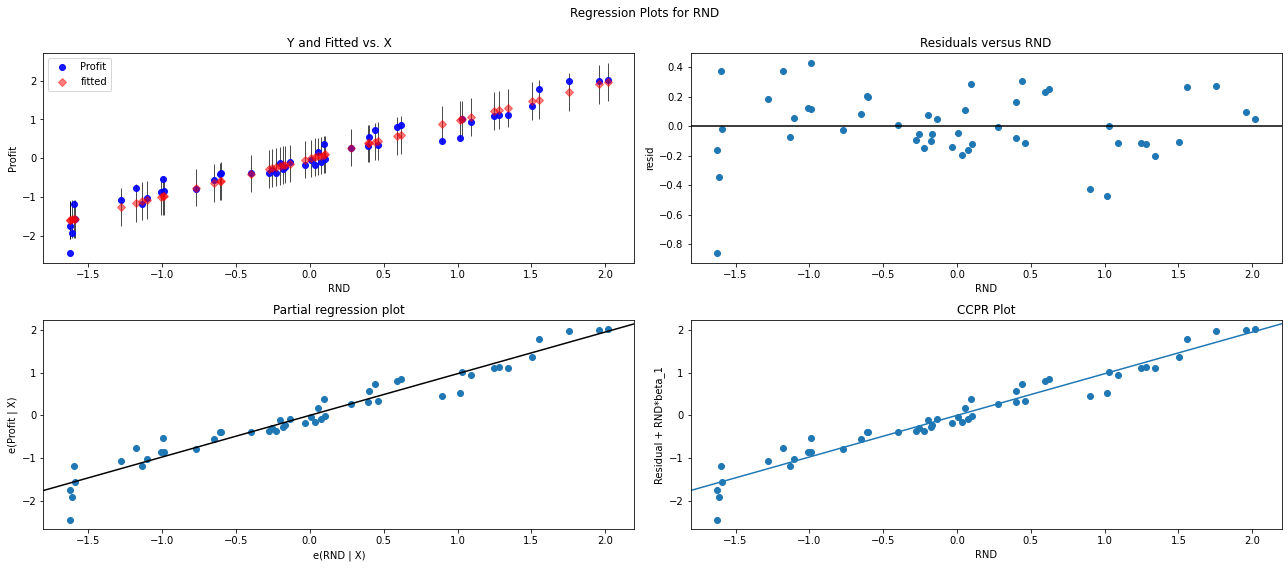

In [76]:
fig = plt.figure(figsize = (18,8))
fig = sm.graphics.plot_regress_exog(model_3,'RND',fig=fig)
plt.show()

## Model Deltion Diagnostics

#### Detecting Influencers/Outliers

In [77]:
model_influence = model_3.get_influence()
(c,_) = model_influence.cooks_distance

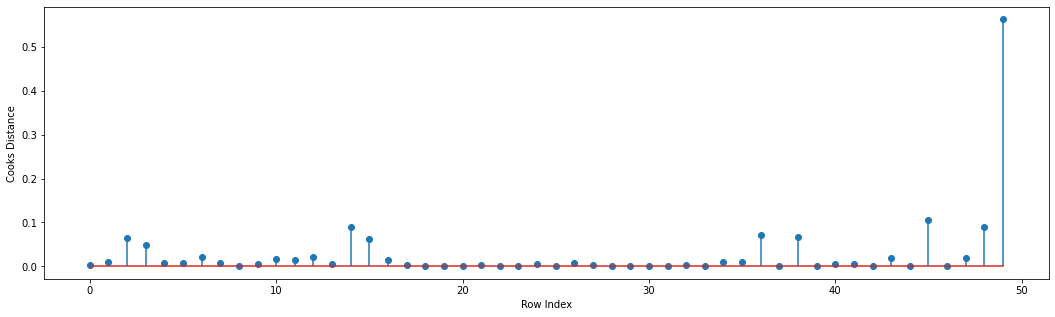

In [78]:
# print(c)
plt.subplots(figsize = (18,5))
plt.stem(np.arange(len(edaData)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

#### High Influencial points

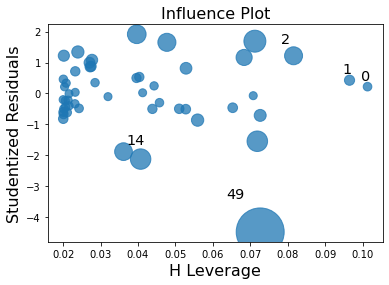

In [80]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_3)
plt.show()

In [81]:
k = scaledData.shape[1]
n = scaledData.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

In [87]:
scaledData.drop(index=49,inplace=True)

In [86]:
scaledData.tail()

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New_York
44,-1.134305,1.206419,-1.509074,-1.173209,1.393261,-0.685994,-0.717741
45,-1.600350,0.101254,-1.727400,-1.180082,-0.717741,-0.685994,1.393261
46,-1.593413,-0.199322,0.711122,-1.566922,-0.717741,1.457738,-0.717741
47,-1.622362,0.507722,-1.743127,-1.740627,1.393261,-0.685994,-0.717741
48,-1.610433,-2.509409,-1.743127,-1.913212,-0.717741,-0.685994,1.393261


In [91]:
model_3_3 = smf.ols('Profit~RND',scaledData).fit()
model_3_3.rsquared

0.9573395972488337

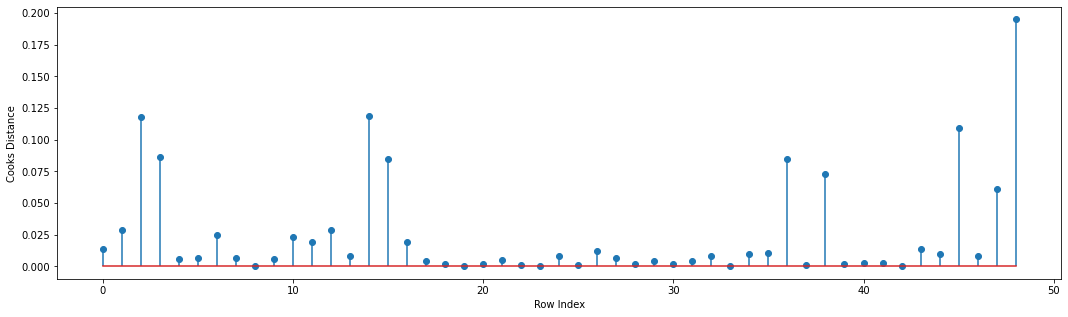

In [94]:
model_influence = model_3_3.get_influence()
(c,_) = model_influence.cooks_distance

plt.subplots(figsize = (18,5))
plt.stem(np.arange(len(scaledData)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [82]:
(np.argmax(c),np.max(c)) # the value is less than leverage_cutoff we finalize the model

(49, 0.562061025926428)

### Predicting the New Data

    AS seen before we are finalizing our model with only RND feature. reffer the previous selection above.

In [95]:
edaData1 = edaData.drop(index=49) # Deleting the 49th record from the non-scaled data as it was detected as outlier 
edaData1.tail()

,RND,Admin,Marketing,Profit,S_California,S_Florida,S_New_York
44,22177.74,154806.14,28334.72,65200.33,1,0,0
45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,1315.46,115816.21,297114.46,49490.75,0,1,0
47,0.00,135426.92,0.00,42559.73,1,0,0
48,542.05,51743.15,0.00,35673.41,0,0,1


In [96]:
Final_model1 = smf.ols('Profit~RND', data= edaData1).fit() ## Without scaled data or with our original data exept 49th record
(Final_model1.rsquared,Final_model1.aic)

(0.9573395972488337, 1021.3600146339439)

In [107]:
Act_Profit = edaData1.Profit
Act_Profit.tail()

44    65200.33
45    64926.08
46    49490.75
47    42559.73
48    35673.41
Name: Profit, dtype: float64

In [108]:
Pred_Profit = Final_model1.predict(edaData1)
Pred_Profit.tail()

44    70083.341562
45    52551.726392
46    52812.686772
47    51723.694794
48    52172.426114
dtype: float64

In [109]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Pred_Profit,Act_Profit, squared=False)
rms

7803.175973683115

In [110]:
resid = Pred_Profit - Act_Profit
rms = np.sqrt(np.mean(resid))
rmse = np.sqrt(np.mean(resid*resid))
(rms,rmse)

(nan, 7803.175973683116)

In [111]:
Final_model2 = smf.ols('Profit~RND', data= scaledData).fit() #with Scaled data
(Final_model2.rsquared,Final_model2.aic)

(0.9573395972488337, -16.867541961731177)

In [121]:
Act_Profit1 = scaledData.Profit
Pred_Profit1 = Final_model2.predict(scaledData)
Pred_Profit1.tail()

44   -1.050831
45   -1.490208
46   -1.483668
47   -1.510960
48   -1.499714
dtype: float64

In [123]:
rms = mean_squared_error(Pred_Profit1,Act_Profit1, squared=False)
rms

0.19556301290205907

***As we can see that both models perform similarly we can coose either of them model 1 has higher accuracy and higher AIC, We are expected to choose the model with high accuracy and low AIC vlaue. I am choosing the Final_model1 as Interpretting the scaled prediction is very difficult***